In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [ ]:
#READING CSV FILE:
bm0 = pd.read_csv('bank-marketing.csv', encoding='unicode_escape')
bm0.head()
print("Dataset with rows {} and columns {}".format(bm0.shape[0],bm0.shape[1]))
bm0.head()

Dataset with rows 45211 and columns 19


,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
bm0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


Hence dataset does not contain any missing value.

In [ ]:
#Univariate Analysis

In [ ]:
bm0.describe()


,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?¶


In [ ]:
bm0.pdays.describe()


count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

If we purely look at numerical summary ie mean and standard deviation, we can't see that lot of values is -1. We can see that 75% values of pdays are -1. So -1 has special meaning over here ie previous campaign was made to them or not. So in our case if we want to make decision on customer who did have campaign previously, then we must exclude all the cases of -1. So, by doing this we can get to customer who had previously campaign.

Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?
pdays uses -1 as indicator and not value. Hence treat these value as missing

Ignore these values in our average/median/state calculations.
Keep it NaN
Wherever pdays is -1, replace with NaN

In [ ]:
bm1=bm0.copy()

In [ ]:
bm1.drop(bm1[bm1['pdays'] < 0].index, inplace = True) 

In [ ]:

bm1.pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

This time mean and median has changed significantly because we have removed the case where pdays value is -1 ie we have removed the customer that were not contacted previously for campaign.

**Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?**


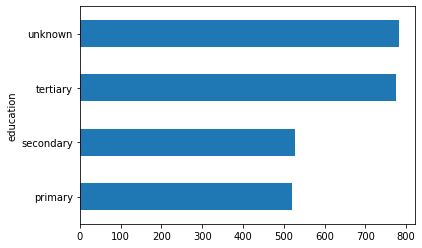

In [ ]:
bm1.groupby(['education'])['balance'].median().plot.barh()

In [ ]:
#Thus, we can conclude from graph that customer with tertiary level of education has highest median value for balance.

Make a box plot for pdays. Do you see any outliers?


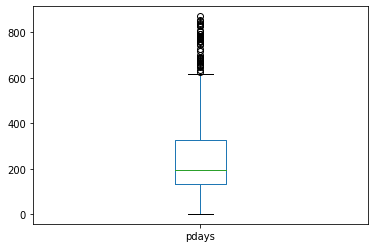

In [ ]:
bm1.pdays.plot.box()
plt.show()

Yes, from the above box plot we can see that there are outliers present in pdays.



The final goal is to make a predictive model to predict if the customer will respond positively to the campaign or not. The target variable is “response”. So performing bi-variate analysis to identify the features that are directly associated with the target variable.
Bi- variate Analysis
Converting the response variable to a convenient form

In [ ]:
bm1.response.value_counts(normalize=True)

no     0.769287
yes    0.230713
Name: response, dtype: float64

In [ ]:
bm1.replace({'response': {"yes": 1,'no':0}},inplace=True)

In [ ]:
bm1.response.value_counts()

no     6352
yes    1905
Name: response, dtype: int64

Make suitable plots for associations with numerical features and categorical features


In [ ]:
# here we are seperating object and numerical data types 
obj_col = []
num_col = []
for col in bm1.columns:
    if bm1[col].dtype=='O':
        obj_col.append(col)
    else:
        num_col.append(col)

In [ ]:
print("Object data type features ",obj_col)
print("Numerical data type features ",num_col)

Object data type features  ['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical data type features  ['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


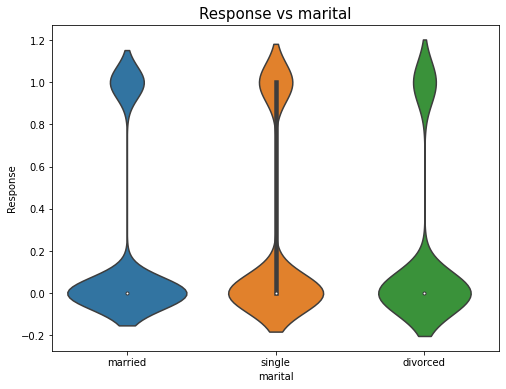

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


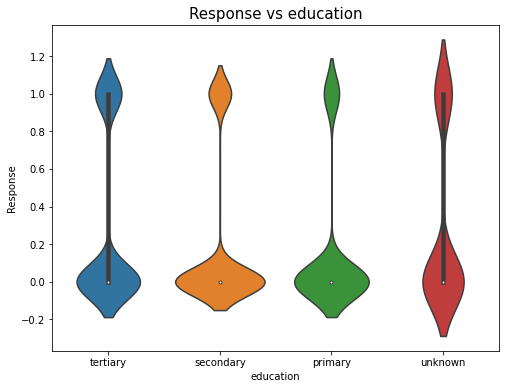

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


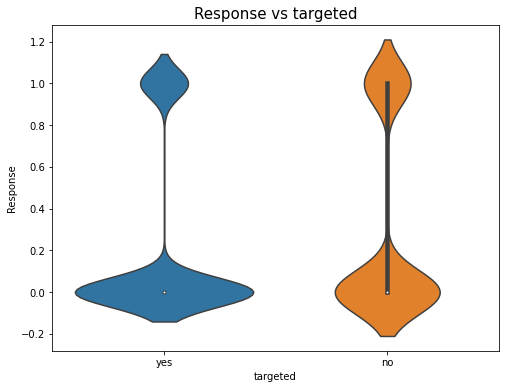

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


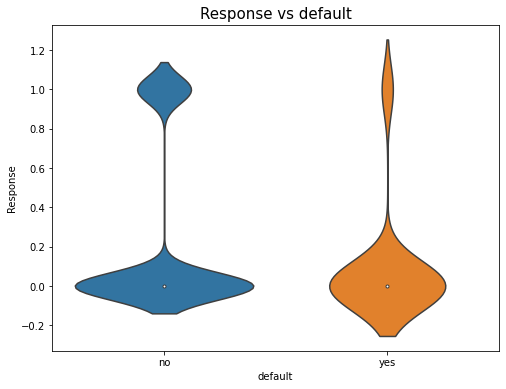

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


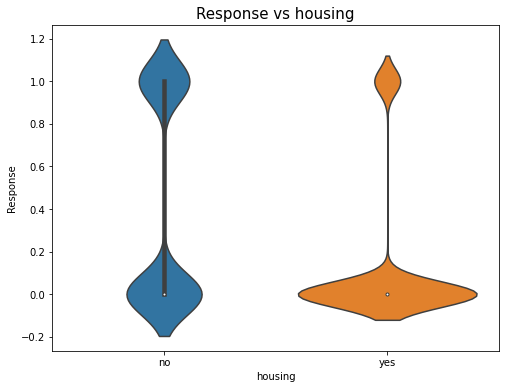

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


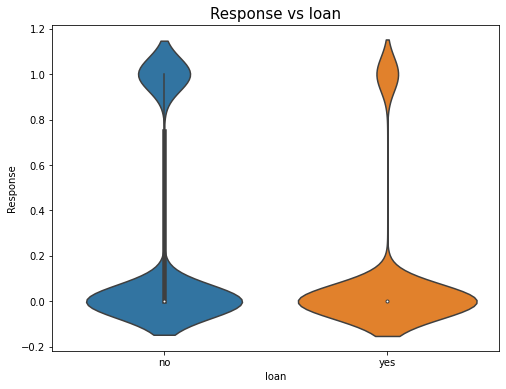

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


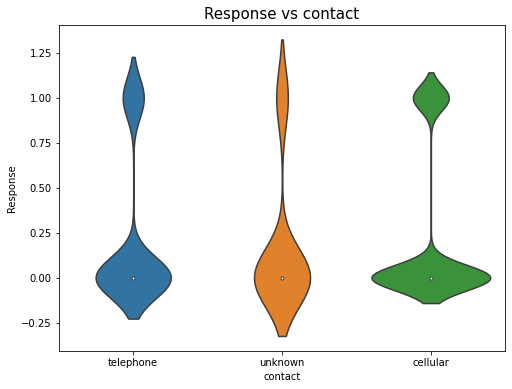

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


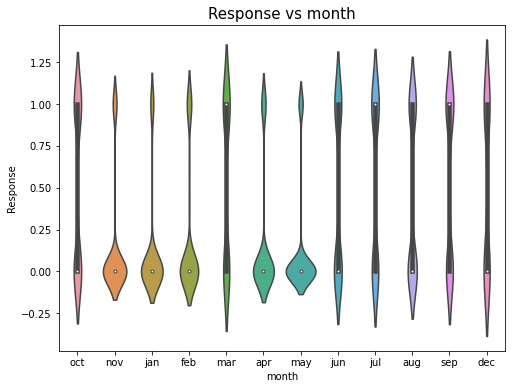

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


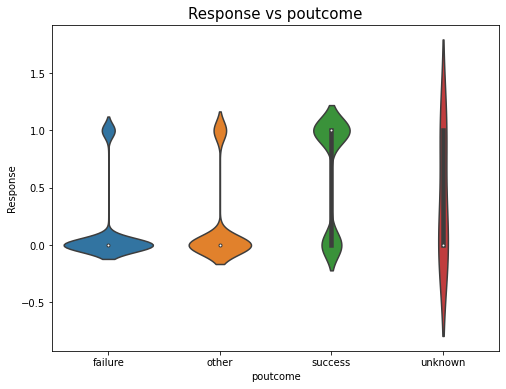

In [ ]:
from numpy import median
for col in obj_col[1:]:
    plt.figure(figsize=(8,6))
    sns.violinplot(bm1[col],bm1["response"])
    plt.title("Response vs "+col,fontsize=15)
    plt.xlabel(col,fontsize=10)
    plt.ylabel("Response",fontsize=10)
    plt.show()
#sns.despine()
# violin plots give best of both worlds 
# it gives boxplot and distribution of data like whether the data is skewed or not.
# if normally distributed then it's the best you can get.
# you can also use barplots in this case.

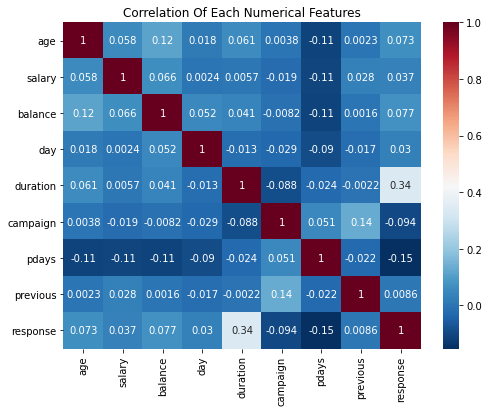

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(bm1.corr(),annot=True,cmap='RdBu_r')
plt.title("Correlation Of Each Numerical Features")
plt.show()

we can see that duration variable is highly correlated with response variable 'Response Flag' . Whereas pdays variable is not highly correlated with response variable 'Response Flag'.

<Figure size 720x576 with 0 Axes>

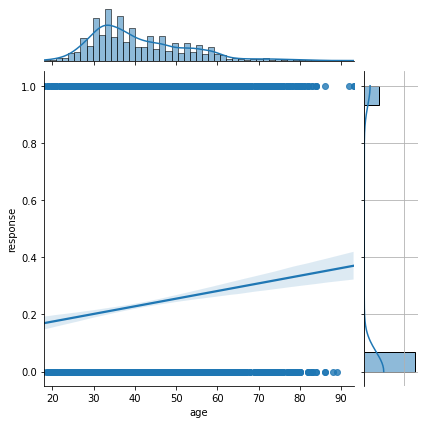

<Figure size 720x576 with 0 Axes>

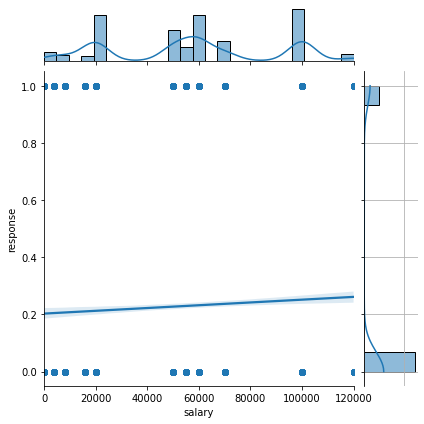

<Figure size 720x576 with 0 Axes>

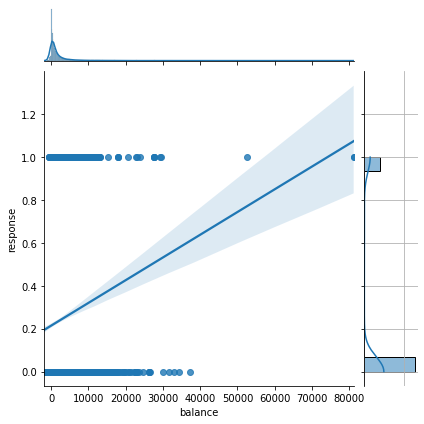

<Figure size 720x576 with 0 Axes>

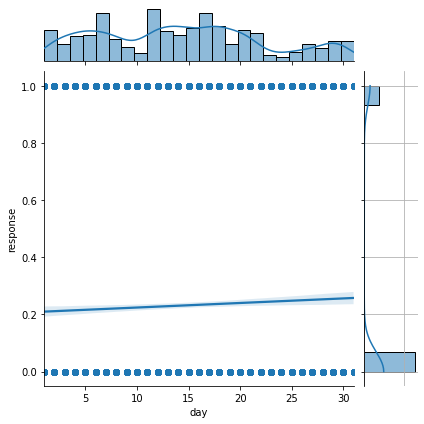

<Figure size 720x576 with 0 Axes>

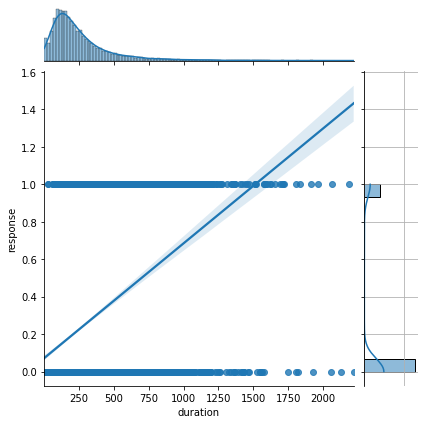

<Figure size 720x576 with 0 Axes>

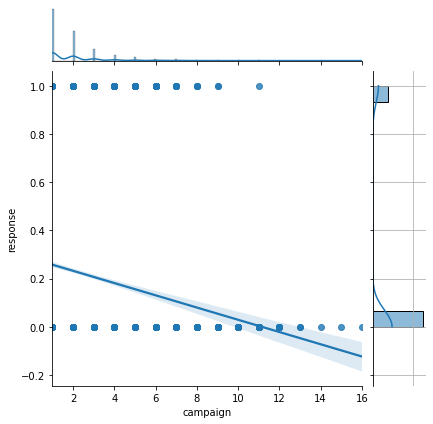

<Figure size 720x576 with 0 Axes>

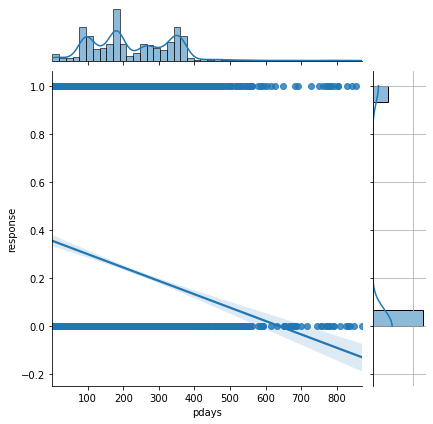

<Figure size 720x576 with 0 Axes>

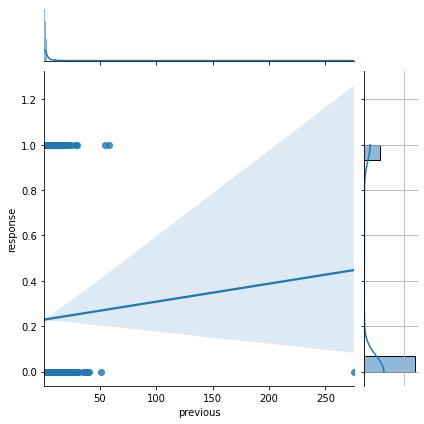

In [ ]:
for col in num_col[:-1]:
    plt.figure(figsize=(10,8))
    sns.jointplot(x = bm1[col],y = bm1["response"],kind='reg')
    plt.xlabel(col,fontsize = 15)
    plt.ylabel("Response",fontsize = 15)
    plt.grid()
    plt.show()

Label Encoding of Categorical Variables.¶


In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
bm2 = bm1[obj_col].apply(LabelEncoder().fit_transform)

In [ ]:
bm2.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome
24060,0,1,2,1,0,0,0,1,10,0
24062,0,2,1,1,0,1,1,1,10,1
24064,7,1,1,1,0,1,0,1,10,0
24072,4,1,2,1,0,1,0,1,10,1
24077,4,1,2,1,0,1,0,1,10,0


In [ ]:
bm3 = bm2.join(bm1[num_col])

In [ ]:
bm3.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response
24060,0,1,2,1,0,0,0,1,10,0,33,50000,882,21,39,1,151,3,0
24062,0,2,1,1,0,1,1,1,10,1,42,50000,-247,21,519,1,166,1,1
24064,7,1,1,1,0,1,0,1,10,0,33,70000,3444,21,144,1,91,4,1
24072,4,1,2,1,0,1,0,1,10,1,36,100000,2415,22,73,1,86,4,0
24077,4,1,2,1,0,1,0,1,10,0,36,100000,0,23,140,1,143,3,1


In [ ]:
bm3.corr()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response
job,1.000000,0.072746,0.159280,-0.091197,-0.021012,-0.132378,-0.033500,-0.006279,-0.002498,0.066642,-0.020606,0.115271,0.041975,0.013841,0.024449,-0.008764,-0.110505,-0.000266,0.081239
marital,0.072746,1.000000,0.121688,-0.255247,-0.005632,-0.056963,-0.055435,-0.031866,-0.024130,0.045015,-0.414972,-0.042212,-0.019767,0.016797,-0.009075,-0.008338,-0.011861,0.004536,0.049234
education,0.159280,0.121688,1.000000,-0.632513,-0.013682,-0.129804,-0.047718,-0.048456,-0.010829,0.082852,-0.119516,0.423157,0.074166,0.023542,-0.001142,-0.024343,-0.140155,0.000115,0.108098
targeted,-0.091197,-0.255247,-0.632513,1.000000,0.019593,0.087470,0.070420,0.020464,0.010187,-0.071356,0.140750,-0.228338,-0.052007,-0.026179,-0.014729,0.017948,0.075638,-0.001205,-0.091216
default,-0.021012,-0.005632,-0.013682,0.019593,1.000000,0.022644,0.052261,-0.019834,0.020123,-0.025566,-0.027825,0.000361,-0.045010,-0.001013,-0.002635,-0.002064,0.033760,0.012149,-0.028299
housing,-0.132378,-0.056963,-0.129804,0.087470,0.022644,1.000000,0.109815,-0.069869,0.014452,-0.284439,-0.179386,-0.035905,-0.109163,-0.066740,-0.072070,0.063071,0.335124,0.008934,-0.317501
loan,-0.033500,-0.055435,-0.047718,0.070420,0.052261,0.109815,1.000000,-0.020904,0.000524,-0.103154,-0.008330,0.013788,-0.085004,0.007550,-0.033874,0.007444,0.022454,0.016549,-0.115805
contact,-0.006279,-0.031866,-0.048456,0.020464,-0.019834,-0.069869,-0.020904,1.000000,0.047045,0.024590,0.166384,-0.035805,0.030317,-0.012330,-0.036360,0.063199,0.077235,0.043830,-0.014321
month,-0.002498,-0.024130,-0.010829,0.010187,0.020123,0.014452,0.000524,0.047045,1.000000,-0.019188,0.013909,0.019820,0.015723,-0.024264,-0.036446,0.023224,0.022529,0.013977,-0.009586
poutcome,0.066642,0.045015,0.082852,-0.071356,-0.025566,-0.284439,-0.103154,0.024590,-0.019188,1.000000,0.051987,0.013079,0.051464,0.017125,0.108473,-0.000502,-0.235119,0.041607,0.420519


Model Building


Logistic Regression Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
np.random.seed(42)

In [ ]:
import warnings
warnings.filterwarnings("ignore")


In [ ]:
X = bm3.drop("response", axis=1)
X.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous
24060,0,1,2,1,0,0,0,1,10,0,33,50000,882,21,39,1,151,3
24062,0,2,1,1,0,1,1,1,10,1,42,50000,-247,21,519,1,166,1
24064,7,1,1,1,0,1,0,1,10,0,33,70000,3444,21,144,1,91,4
24072,4,1,2,1,0,1,0,1,10,1,36,100000,2415,22,73,1,86,4
24077,4,1,2,1,0,1,0,1,10,0,36,100000,0,23,140,1,143,3


In [ ]:
y= bm3[['response']]
y.head()

,response
24060,0
24062,1
24064,1
24072,0
24077,1


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)


In [ ]:
lr = LogisticRegression()


In [ ]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
cv_score= cross_val_score(lr,X_train,y_train, cv=5)
np.mean(cv_score)

0.777895533686601

In [ ]:
y_pred = lr.predict(X_test)


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1279
           1       0.57      0.20      0.29       373

    accuracy                           0.79      1652
   macro avg       0.69      0.58      0.58      1652
weighted avg       0.75      0.79      0.74      1652



In [ ]:
confusion_matrix(y_pred,y_test)

array([[1224,  299],
       [  55,   74]])

In [ ]:
f1_score(y_pred,y_test)

0.29482071713147406

RFE

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rfe = RFE(lr, 5)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=5, step=1, verbose=0)

In [ ]:
rfe.support_

array([False, False, False, False,  True,  True,  True,  True, False,
        True, False, False, False, False, False, False, False, False])

In [ ]:
X_train.columns[rfe.support_]

Index(['default', 'housing', 'loan', 'contact', 'poutcome'], dtype='object')

In [ ]:
cols = X_train.columns[rfe.support_]

In [ ]:
lr.fit(X_train[cols],y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred2 = lr.predict(X_test[cols])

In [ ]:
f1_score(y_pred2,y_test)

0.5043478260869565

In [ ]:
confusion_matrix(y_pred2,y_test)

array([[1222,  228],
       [  57,  145]])

use statsmodel

In [ ]:
import statsmodels.api as sm

In [ ]:
X_train.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous
40829,0,2,1,1,0,1,0,0,1,2,40,50000,100,11,221,1,461,1
29715,9,1,1,1,0,0,1,0,3,0,45,60000,366,3,235,2,169,12
35015,9,1,1,1,0,1,0,0,8,0,32,60000,-360,6,131,2,344,2
41008,0,2,2,0,0,0,0,0,1,2,36,50000,994,13,185,2,105,3
40646,8,2,1,1,0,1,0,1,1,0,25,4000,41,5,100,2,93,2


Add intercept manually for statsmodel to work



In [ ]:
X_train_sm = sm.add_constant(X_train[cols])
X_train_sm.head()

,const,default,housing,loan,contact,poutcome
40829,1.0,0,1,0,0,2
29715,1.0,0,0,1,0,0
35015,1.0,0,1,0,0,0
41008,1.0,0,0,0,0,2
40646,1.0,0,1,0,1,0


In [ ]:
lr1 = sm.OLS(y_train, X_train_sm).fit()

In [ ]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     378.4
Date:                Sun, 27 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:36:12   Log-Likelihood:                -2842.3
No. Observations:                6605   AIC:                             5697.
Df Residuals:                    6599   BIC:                             5737.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2556      0.010     26.881      0.000       0.237       0.274
default       -0.0629      0.056     -1.127      0.260      -0.172       0.047
housing       -0.1904      0.010    -19.192      0.000      -0.210      -0.171
loan          -0.0730      0.014     -5.394      0.000      -0.099      -0.046
contact       -0.0618      0.014     -4.346      0.000      -0.090      -0.034
poutcome       0.1873      0.006     30.507      0.000       0.175       0.199
==============================================================================
Omnibus:                      750.000   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1028.279
Skew:                           0.954   Prob(JB):                    5.15e-224
Kurtosis:                       3.306   Cond. No.                         16.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,age,11.79
2,education,6.43
3,targeted,6.43
11,salary,5.38
16,pdays,5.21
1,marital,4.35
13,day,4.10
8,month,3.60
5,housing,3.14
15,campaign,2.87


Housing, loan, default, poutcome are imp feature from logistic regression model perspective



Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(max_depth=5, random_state=42,max_leaf_nodes=50)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=50, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
cv1_score= cross_val_score(rfc,X_train,y_train, cv=5)
np.mean(cv1_score)

0.8392127176381529

In [ ]:
y_pred1 = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1279
           1       0.80      0.45      0.57       373

    accuracy                           0.85      1652
   macro avg       0.83      0.71      0.74      1652
weighted avg       0.84      0.85      0.83      1652



In [ ]:
f1_score(y_test,y_pred1)

0.5728987993138936

In [ ]:
confusion_matrix(y_test,y_pred1)

array([[1236,   43],
       [ 206,  167]])

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_test,y_pred1)

0.7070505819937242

RFE

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rfe1 = RFE(rfc, 5)
rfe1.fit(X_train,y_train)


RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=5, max_features='auto',
                                     max_leaf_nodes=50, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=42,
                                     verbose=0, warm_start=False),
    n_features_to_select=5, step=1, verbose=0)

In [ ]:
rfe1.support_

array([False, False, False, False, False,  True, False, False,  True,
        True, False, False, False, False,  True, False,  True, False])

In [ ]:
X_train.columns[rfe1.support_]

Index(['housing', 'month', 'poutcome', 'duration', 'pdays'], dtype='object')

In [ ]:
cols = X_train.columns[rfe1.support_]

In [ ]:
rfc.fit(X_train[cols],y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=50, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_pred3 = rfc.predict(X_test[cols])

In [ ]:

f1_score(y_pred3,y_test)

0.631911532385466

In [ ]:
confusion_matrix(y_pred3,y_test)

array([[1219,  173],
       [  60,  200]])